Prior to running the notebook, fetch data by running:
```bash
python __main__.py download --seasons 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
```

In [1]:
from nba_mvp_predictor import load
import scipy

In [2]:
def r2(x, y):
    regression = scipy.stats.linregress(x, y)
    return regression.slope, regression.intercept, regression.rvalue ** 2

In [3]:
stats = load.load_player_stats(nrows=None)

In [4]:
stats.sample(10)

,PLAYER,AGE,TEAM,POS,G,GS,MP,FG_per_game,FGA_per_game,FG%,...,TOV%_advanced,USG%_advanced,OWS_advanced,DWS_advanced,WS_advanced,WS/48_advanced,OBPM_advanced,DBPM_advanced,BPM_advanced,VORP_advanced
player_season_team,,,,,,,,,,,,,,,,,,,,,
JoelFreeland_2014_POR,JoelFreeland,26.0,POR,C,52.0,0.0,14.0,1.5,3.1,0.475,...,15.5,12.4,0.7,0.7,1.4,0.093,-2.6,0.0,-2.6,-0.1
ÖmerAşık_2012_CHI,ÖmerAşık,25.0,CHI,C,66.0,2.0,14.7,1.2,2.4,0.506,...,25.2,12.6,0.1,2.5,2.6,0.129,-3.2,2.5,-0.7,0.3
GeraldWallace_2010_CHA,GeraldWallace,27.0,CHA,SF,76.0,76.0,41.0,6.0,12.4,0.484,...,13.1,20.3,5.3,6.2,11.5,0.177,1.0,1.7,2.7,3.7
Ersanİlyasova_2016_TOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.9,18.6,2.4,2.0,4.4,0.113,0.2,-0.4,-0.2,0.9
QuincyAcy_2014_2TM,QuincyAcy,23.0,2TM,SF,63.0,0.0,13.4,1.0,2.2,0.468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FrankMasonIII_2019_SAC,FrankMasonIII,24.0,SAC,PG,38.0,0.0,11.4,1.9,4.4,0.420,...,15.6,21.8,0.0,0.3,0.3,0.033,-1.9,-1.3,-3.1,-0.1
SolomonJones_2011_IND,SolomonJones,26.0,IND,C,39.0,0.0,13.5,1.3,3.1,0.405,...,19.1,15.4,-0.2,0.6,0.5,0.042,-5.3,0.8,-4.5,-0.3
MikeScott_2019_2TM,MikeScott,30.0,2TM,PF,79.0,3.0,17.7,2.1,5.3,0.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DraymondGreen_2014_GSW,DraymondGreen,23.0,GSW,SF,82.0,12.0,21.9,2.3,5.6,0.407,...,15.1,14.8,0.7,3.8,4.5,0.119,-1.7,3.6,1.9,1.8


In [5]:
stats['3PA_total'] = stats['3PA_per_game'] * stats['G']
stats['FGA_total'] = stats['FGA_per_game'] * stats['G']

In [6]:
stats.columns

Index(['PLAYER', 'AGE', 'TEAM', 'POS', 'G', 'GS', 'MP', 'FG_per_game',
       'FGA_per_game', 'FG%', '3P_per_game', '3PA_per_game', '3P%',
       '2P_per_game', '2PA_per_game', '2P%', 'EFG%_per_game', 'FT_per_game',
       'FTA_per_game', 'FT%', 'ORB_per_game', 'DRB_per_game', 'TRB_per_game',
       'AST_per_game', 'STL_per_game', 'BLK_per_game', 'TOV_per_game',
       'PF_per_game', 'PTS_per_game', 'AWARDS_per_game', 'SEASON',
       'FG_per_36min', 'FGA_per_36min', '3P_per_36min', '3PA_per_36min',
       '2P_per_36min', '2PA_per_36min', 'EFG%_per_36min', 'FT_per_36min',
       'FTA_per_36min', 'ORB_per_36min', 'DRB_per_36min', 'TRB_per_36min',
       'AST_per_36min', 'STL_per_36min', 'BLK_per_36min', 'TOV_per_36min',
       'PF_per_36min', 'PTS_per_36min', 'AWARDS_per_36min', 'FG_per_100poss',
       'FGA_per_100poss', '3P_per_100poss', '3PA_per_100poss',
       '2P_per_100poss', '2PA_per_100poss', 'FT_per_100poss',
       'FTA_per_100poss', 'ORB_per_100poss', 'DRB_per_100poss',
    

In [7]:
minimum_events = 10
event_columns = 'FGA_per_game'
metric_column = 'TS%_advanced'


stats = stats[stats[event_columns] >= minimum_events]

In [8]:
stats[f'{metric_column}_previous_season'] = stats.groupby('PLAYER')[metric_column].shift(1)
stats['previous_season'] = stats.groupby('PLAYER')['SEASON'].shift(1)
stats = stats[stats['previous_season'].notna()]
stats = stats[
    stats['previous_season'] == stats['SEASON'] - 1
]

stats = stats[stats[f'{metric_column}_previous_season'].notna()]
stats = stats[stats[metric_column].notna()]

In [9]:
a,b,r_squared = r2(stats[metric_column], stats[f'{metric_column}_previous_season'])

R² = 0.40


<Axes: title={'center': 'Minimum 10 FGA_per_game in both seasons'}, xlabel='TS%_advanced_previous_season', ylabel='TS%_advanced'>

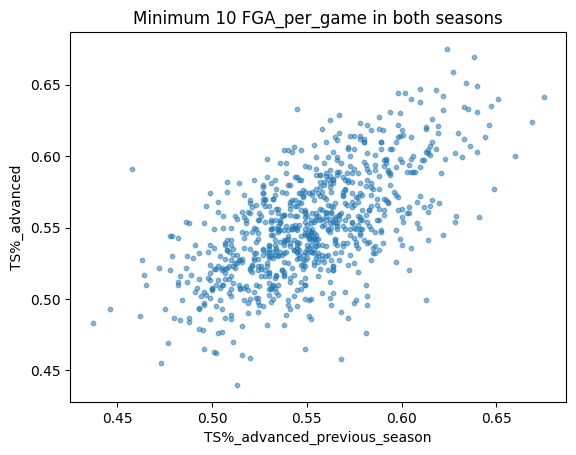

In [10]:
print(f"R² = {r_squared:.2f}")
stats.plot.scatter(
    x=f'{metric_column}_previous_season',
    y=metric_column,
    alpha=0.5,
    s=10,
    title=f'Minimum {minimum_events} {event_columns} in both seasons'
)